In [20]:
import pandas as pd

df = pd.read_csv("covid_data.csv")

### CRUCIAL TO BE ABLE TO PERFORM LOGICAL OPERATION BETWEEN DATES

In [21]:
df["date"] = pd.to_datetime(df['date']) # CRUCIAL TO BE ABLE TO PERFORM LOGICAL OPERATION BETWEEN DATES

# FIRST ANSWER

In [22]:
df_by_specific_date = df.loc[(df["date"] == "2020-03-23")]  # New df about sorting the values we want by the specific date
# we want 

df_without_world_sum = df_by_specific_date[df_by_specific_date['iso_code'] != 'OWID_WRL']  # Exclude OWID_WRL from our 
# dataframe because it acts like the world sum

In [23]:
max_cases_on_first_lockdown = df_without_world_sum['total_cases'].max()  # Finds the max of 'total_cases' in 
# df_without_world_sum using the .max() method of dataframes

In [24]:
most_total_cases_row = df_by_specific_date[df_by_specific_date['total_cases'] == max_cases_on_first_lockdown]  # Checks 
# when 'total cases' value is equal to the value we want and creates new dataframe containing only 1 row

most_total_cases_country_on_greece_first_lockdown = most_total_cases_row['location'].iloc[0] # Finds from the newly created
# dataframe which country is in using ['location'] to find the value on that column and iloc[0] to get only the name of the
# country. 
# This case: China

print("The country is:", most_total_cases_country_on_greece_first_lockdown) # Prints the name of the country with the most 
# 'total_cases' when the first lockdown happened in Greece (23/3/2020)

The country is: China


# SECOND ANSWER

In [25]:
df_of_specific_week = df[(df['date'] >= '2020-3-23') & (df['date'] <= '2020-3-29')] #Creates new dataframe of the total one
# that contains data only from 23-29/3/2020

df_of_specific_week_asorted = df_of_specific_week.sort_values(["new_cases"], ascending = False) # Sorts the 'new_cases' values
# of the df going from the biggest to smallest 

df_of_specific_week_without_world_sum = df_of_specific_week_asorted[df_of_specific_week_asorted['iso_code'] != 'OWID_WRL']
# excludes 'iso_code' value of 'OWID_WRL' out of our dataframe because it acts as a sum of all data out of all countries

most_new_cases_country_on_specific_week = df_of_specific_week_without_world_sum['location'].iloc[0] # Finds the country
# that have the most 'new_cases' in the between the dates set on df_of_specific_week

print("The country with most 'new_cases' between 23-29/3/2020 is:", most_new_cases_country_on_specific_week) # Prints the 
#country found earlier

The country with most 'new_cases' between 23-29/3/2020 is: United States


# THIRD ANSWER

In [26]:
df_greece = df[df['location'] == 'Greece']  # New df showing data only for 'location' is 'Greece'

df_greece_bf_first_lckdn = df_greece[(df_greece['date'] >= '2020-3-16') & (df_greece['date'] <= '2020-3-22')]  # New df where
# location is greece and the dates range from 16-22/3/2020


In [27]:
sum_of_new_cases_week_bf_greece_first_lockdown = df_greece_bf_first_lckdn['new_cases'].sum()  # Sums the 'new_cases' in the
# specific week (16-22/3/2020)

print("Greece had", sum_of_new_cases_week_bf_greece_first_lockdown, "new cases the week before first lockdown.") # Prints the
# total sum of 'new_cases' for the week before Greece's first lockdown

Greece had 302.0 new cases the week before first lockdown.


In [28]:
df_greece_bf_second_lckdn = df_greece[(df_greece['date'] >= '2020-10-31') & (df_greece['date'] <= '2020-11-06')]  # New df
# where location is greece and the dates range from 31/10-06/11/2020

In [29]:
sum_of_new_cases_week_bf_greece_second_lockdown = df_greece_bf_second_lckdn['new_cases'].sum()  # Sums the 'new_cases' in the
# specific week (31/10-06/11/2020)

print("Greece had", sum_of_new_cases_week_bf_greece_second_lockdown, "new cases the week before second lockdown.") # Prints the
# total sum of 'new_cases' for the week before Greece's second lockdown

Greece had 14297.0 new cases the week before second lockdown.


# FOURTH ANSWER

In [35]:
max_total_deaths_per_million = df['total_deaths_per_million'].max() # Finds the maximum 'total_deaths_per_million' values in
# our dataframe

In [36]:
most_death_ratio_row = df[df['total_deaths_per_million'] == max_total_deaths_per_million] # Checks when  when
# 'total total_deaths_per_million' value is equal to 'max_total_deaths_per_million' and creates new dataframe containing
# only 1 row

most_death_ratio_country = most_death_ratio_row['location'].iloc[0] # Finds from the newly created which country is in
# using ['location'] to find the value on that column and iloc[0] to get only the name of the  country. 
# This case: Belgium 

print("The country is: ", most_death_ratio_country, "\nWith" ,max_total_deaths_per_million, "deaths per million") # Prints the
# name of the country with the most 'total_deaths_per_million' in the dataframe

The country is:  Belgium 
With 1350.088 deaths per million


# FIFTH ANSWER

In [43]:
latest_date = df.sort_values(["date"], ascending = False)['date'].iloc[0]  # Sorts the values of the dates (starting from the
# most recent to the oldest) then get the values out of column 'date' and using .iloc[0] locates the first value that it finds
# in this case: 2020-11-24

In [44]:
new_df = df[(df['date'] == latest_date) & (df['location'] != 'World') & (df['location'] != 'International')]  # New dataframe
# where the date is the same as 'latest_date' and locations 'World' and 'International' are excluded

In [45]:
max = new_df['total_deaths'].div(new_df['total_cases']).max() # Finds the max of this division in our dataframe

In [46]:
needed_row = new_df[(new_df['total_deaths']/new_df['total_cases']) == max]  # Finds which row has 'total_deaths'/'total_cases'
# value equal to our max value

In [47]:
most_deaths_per_case_country = needed_row['location'].iloc[0] # Finds the country that has the most deaths per case

In [48]:
print("The country with most deaths per case ('total_deaths'/'total_cases') is:",most_deaths_per_case_country) # Prints the
# country that has the most deaths per case

The country with most deaths per case ('total_deaths'/'total_cases') is: Yemen


# SECOND PART

## First answer

In [49]:
df_greece_specific = df_greece[['date','new_cases','new_deaths']] # New df of only the specific three columns we need 
# from df_greece dataframe that contains data for only Greece

In [50]:
df_greece_specific.index = df_greece_specific['date']  # Replaces the indexes of our dataframe with the values of
# the 'date' variable
df_greece_specific[['new_cases', 'new_deaths']].resample('1M').agg(['mean','std']) # New df where only the  
# wanted columns are being showed using resample (divides the date into 1 month bins) and using the .agg() function
# to perform .mean() and .std() functions for our statistical analysis


new_cases             new_deaths           
                   mean         std       mean        std
date                                                     
2019-12-31     0.000000         NaN   0.000000        NaN
2020-01-31     0.000000    0.000000   0.000000   0.000000
2020-02-29     0.137931    0.441114   0.000000   0.000000
2020-03-31    41.655172   31.867220   1.482759   1.844310
2020-04-30    45.466667   39.825250   3.200000   2.426861
2020-05-31    10.935484    8.721374   1.161290   1.035914
2020-06-30    15.833333   12.066149   0.533333   0.899553
2020-07-31    32.612903   14.382113   0.387097   0.715422
2020-08-31   184.935484   62.537954   1.903226   1.619770
2020-09-30   266.300000   82.854734   4.200000   2.187740
2020-10-31   615.258065  378.469723   7.483871   3.501152
2020-11-30  2325.416667  621.043016  45.583333  28.640070

## Second answer 

In [88]:
df_portugal = df[df['location'] == 'Portugal'] # Create dataframe which contains data only for Portugal

df_portugal_specific = df_portugal[['date','new_cases','new_deaths']] # New df of only the specific three columns we need 
# from df_portugal dataframe

In [89]:
df_portugal_specific.index = df_portugal_specific['date'] # Replaces the indexes of our dataframe with the values of 
# the 'date' variable

df_portugal_specific[['new_cases', 'new_deaths']].resample('1M').agg(['mean','std']) # New df where only the  
# wanted columns are being showed using resample (divides the date into 1 month bins) and using the .agg() function
# to perform .mean() and .std() functions for our statistical analysis

new_cases              new_deaths           
                   mean          std       mean        std
date                                                      
2020-02-29          NaN          NaN        NaN        NaN
2020-03-31   220.965517   271.795549   4.827586   7.512223
2020-04-30   609.466667   280.446040  28.300000   8.330045
2020-05-31   242.290323   137.889858  13.129032   6.576432
2020-06-30   323.633333    75.003670   5.733333   3.777733
2020-07-31   288.903226    98.829602   5.129032   3.073998
2020-08-31   222.580645    88.332242   2.967742   1.834555
2020-09-30   564.966667   191.780133   4.800000   2.618238
2020-10-31  2017.903226  1151.114485  16.290323   9.019215
2020-11-30  5313.750000  1555.355523  62.625000  14.808377

## Third answer 

In [90]:
df_italy = df[df['location'] == 'Italy']  # New df with only Italy as a location

In [91]:
df_italy_specific_dates = df_italy[(df_italy['date'].dt.month >= 2) & (df_italy['date'].dt.month <= 7)]  # Sets the date span
# to be only the 5 months we want (from February 2020 to July 2020)

In [92]:
df_italy_specific_dates.index = df_italy_specific_dates['date']  # Sets the index of our df to be the dates

In [93]:
df_grouped_data = df_italy_specific_dates.groupby(df_italy_specific_dates.date.dt.to_period('M')).agg(['mean','std']) 
# groupby method we group the dataframe df_italy_specific_dates by date (containing only year and month)
# using the .agg() function to perform .mean() and .std() functions for our statistical analysis

In [94]:
df_data = df_grouped_data[['new_cases_per_million', 'icu_patients_per_million','new_tests_per_thousand']] # Takes from the
# df_grouped_data dataframe only the three key-variables of our choice for the statistical analysis

In [95]:
 df_data  # showcases the df

new_cases_per_million            icu_patients_per_million             \
                         mean        std                     mean        std   
date                                                                           
2020-02              0.504724   1.096726                 0.887667   0.478033   
2020-03             53.806871  35.174565                32.841323  22.591159   
2020-04             56.152200  14.924322                49.212333  12.949976   
2020-05             15.511323   7.578834                14.596323   6.073212   
2020-06              4.284767   2.129632                 3.430833   1.601996   
2020-07              3.586323   0.947108                 0.957097   0.228937   

        new_tests_per_thousand            
                          mean       std  
date                                      
2020-02               0.047400  0.021126  
2020-03               0.260581  0.174764  
2020-04               0.811700  0.210154  
2020-05               1.013452  0.197785  
2020-06               0.833267  0.227061  
2020-07               0.759323  0.177243

In [96]:
mean_data = [df_data['new_cases_per_million']['mean'],
             df_data['icu_patients_per_million']['mean'],df_data['new_tests_per_thousand']['mean']]
# Creates thee variable to store each value of the upper three dataframes (Caution: df_data['new_cases_per_million'] is a  
# dataframe on its own and has 2 more colums {'mean' and 'std'}, we want to extract only the key-variable 'mean')

In [97]:
mean_df = pd.concat(mean_data, axis=1) # Concatanates the data collected before into a new dataframe 

In [98]:
mean_df.columns = ['new_cases_per_million', 'icu_patients_per_million','new_tests_per_thusand'] # Renames the colums of the 
# newly created dataframe (previously named 'mean')

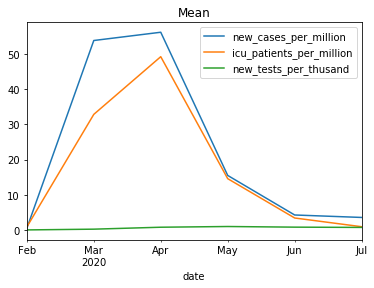

In [99]:
mean_df.plot(title = 'Mean')  # Creates a diagram showcases the mean values for each variable

In [100]:
std_data = [df_data['new_cases_per_million']['std'],
            df_data['icu_patients_per_million']['std'],df_data['new_tests_per_thousand']['std']]
# Creates the variable to store each value of the upper three dataframes (Caution: df_data['new_cases_per_million'] is a  
# dataframe on its own and has 2 more colums {'mean' and 'std'}, we want to extract only the key-variable 'std')

In [101]:
std_df = pd.concat(std_data, axis=1) # Concatanates the data collected before into a new dataframe 

In [102]:
std_df.columns = ['new_cases_per_million', 'icu_patients_per_million','new_tests_per_thusand'] # Renames the colums of the 
# newly created dataframe (previously named 'std')

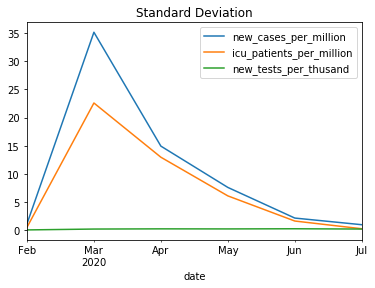

In [103]:
std_df.plot(title = "Standard Deviation") # Creates a diagram showcases the mean values for each variable

# THIRD PART

## First answer

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
from scipy import stats

In [106]:
df_only_world = df[df['location'] == 'World'] # Creates dataframe where only contains data about the world (sum of all other 
# countries)

df_correlation = df_only_world[['total_cases','total_deaths']].dropna() # Creates dataframe to be used for the first correlation
# test (contains only the 'total_cases' and 'total_deaths' columns from the df_only_world dataframe).
# Also, excludes the NaN values from both of them

In [107]:
r, p = stats.pearsonr(df_correlation['total_cases'], df_correlation['total_deaths']) # The correlation test through
# scipy.stats 

In [108]:
r # Pearson's r value

0.9721076608791572

In [109]:
p # P-value

1.0450573665648478e-201

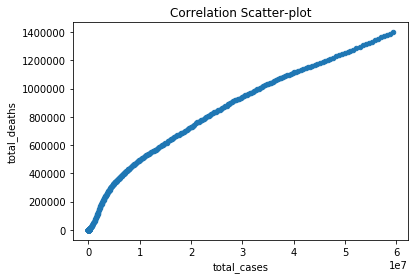

In [110]:
df_correlation.plot.scatter(x = 'total_cases', y = 'total_deaths', title = 'Correlation Scatter-plot') # Creates and shows the
# scatter plot of those columns we used for the test

## Second answer 

In [115]:
df_latest_data = df[(df['date'] == df['date'].max()) & (df['location'] != 'World') & (df['location'] != 'International')]
# Creates new dataframe containing data of only the latest date in our original dataframe
# Also, 'World' and 'International' values are excluded as they contain total values and we want data for each country 
# separately

df_ttest = df_latest_data[['gdp_per_capita','total_deaths_per_million']].dropna() # Creates dataframe to be used for the t-test
# (contains only the 'gdp_per_capita' and 'total_deaths_per_million' columns from the df_latest_data).
# Also, excludes the NaN values from both of them

In [117]:
t, p = stats.ttest_rel(df_ttest['gdp_per_capita'], df_ttest['total_deaths_per_million']) # The t-test through scipy.stats 

In [118]:
t # T-Score

12.444901269070117

In [119]:
p # P-Value

1.415571764830309e-25

## Third answer 

In [123]:
df_italy # Dataframe which contains data for only Italy (Created in 2.3)

df_second_correlation = df_italy[['total_tests','total_cases']].dropna() # Creates dataframe to be used for the second 
# correlatio test (contains only the 'total_tests' and 'total_cases' columns from the df_italy dataframe).
# Also, excludes the NaN values from both of them 

In [124]:
r, p = stats.pearsonr(df_second_correlation['total_tests'], df_second_correlation['total_cases']) # The correlation test through
# scipy.stats 

In [125]:
r # Pearson's r value

0.8689820945708067

In [126]:
p # P-value

8.837501991362106e-85

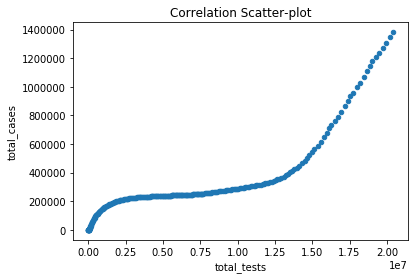

In [127]:
df_second_correlation.plot.scatter(x = 'total_tests', y = 'total_cases', title = 'Correlation Scatter-plot') # Creates and
# shows the scatter plot of those two columns we used for the test

## Fourth answer 

In [130]:
df_usa = df[df['location'] == 'United States'] # Creates dataframe containing data for only United States

df_third_correlation = df_usa[['total_cases','hosp_patients']].dropna() # Creates dataframe to be used for the third 
# correlatio test (contains only the 'total_cases' and 'hosp_patients' columns from the df_usa dataframe).
# Also, excludes the NaN values from both of them 

In [131]:
r, p = stats.pearsonr(df_third_correlation['total_cases'], df_third_correlation['hosp_patients']) # The correlation test through
# scipy.stats 

In [132]:
r # Pearson's r value

0.2533972040641669

In [133]:
p # P-value

5.620839376412815e-05

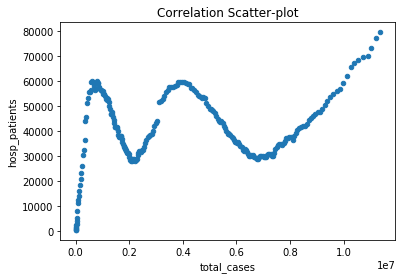

In [134]:
df_third_correlation.plot.scatter(x = 'total_cases', y = 'hosp_patients', title = 'Correlation Scatter-plot') # Creates and
# shows the scatter plot of those two columns we used for the test

In [136]:
df_fourth_correlation = df_usa[['icu_patients','new_deaths']].dropna() # Creates dataframe to be used for the fourth
# correlatio test (contains only the 'icu_patients' and 'new_deaths' columns from the df_usa dataframe).
# Also, excludes the NaN values from both of them 

In [137]:
r, p = stats.pearsonr(df_fourth_correlation['icu_patients'], df_fourth_correlation['new_deaths']) # The correlation test through
# scipy.stats 

In [138]:
r # Pearson's r value

0.6624385570678872

In [139]:
p # P-value

1.928371726166885e-31

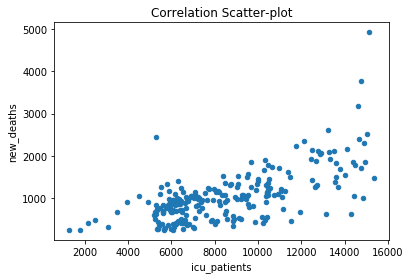

In [140]:
df_fourth_correlation.plot.scatter(x = 'icu_patients', y = 'new_deaths', title = 'Correlation Scatter-plot') # Creates and
# shows the scatter plot of those two columns we used for the test